In [24]:
from Boxan_obj import *       

df = pd.read_excel('Домашнее задание №2 ММР.xlsx', header=1,index_col=0, usecols=[1,2,3,4,5,6,7,8])
df.columns=['Y', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6']

analysis = BoxAn(df)


analysis.data.head()

,Y,X1,X2,X3,X4,X5,X6
1,1440075,61749,1007355,4920199,5165712,3490541,31365
2,5146,17532,58110,50798,19595,23014,0
3,13612,20268,51271,18903,81072,8678,84
4,964,211,5827,13398,8446,4821,0
5,19513178,52034182,2411352,63269757,47002385,23780450,1696853


# 1. Проанализировать ряды данных. Посмотреть, если ли выбросы, если необходимо удалить. Обосновать удпаление. 

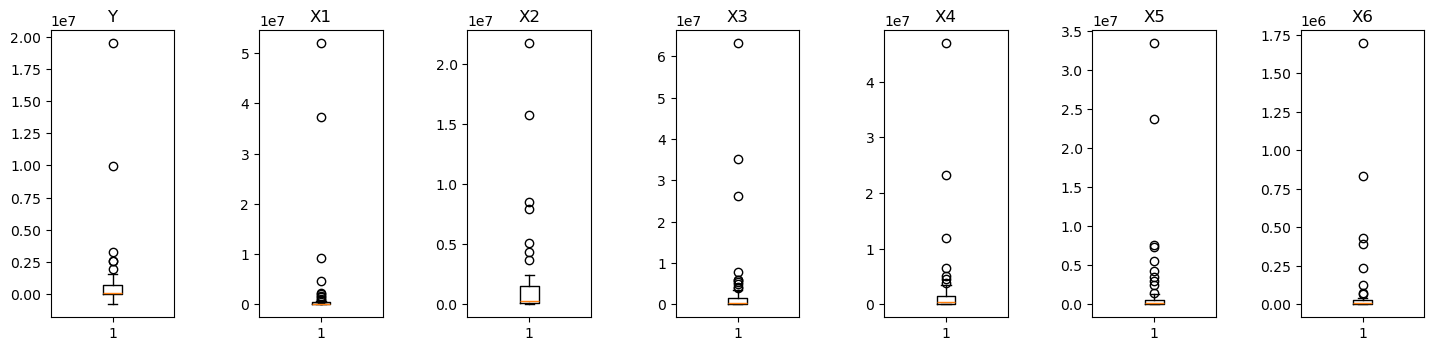

In [25]:
analysis.boxplots()

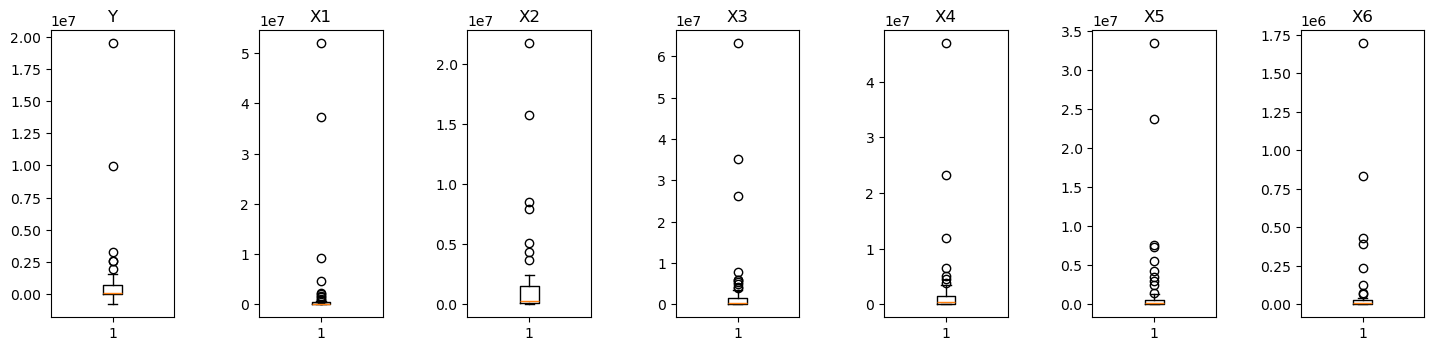

In [26]:
#analysis.drop_max_y(times=2)
#analysis.remove_bad_data_x_times()
analysis.boxplots()

# 2. Построить диаграммы рассеяния Прибыли с регрессорами. Провести визуальный анализ.

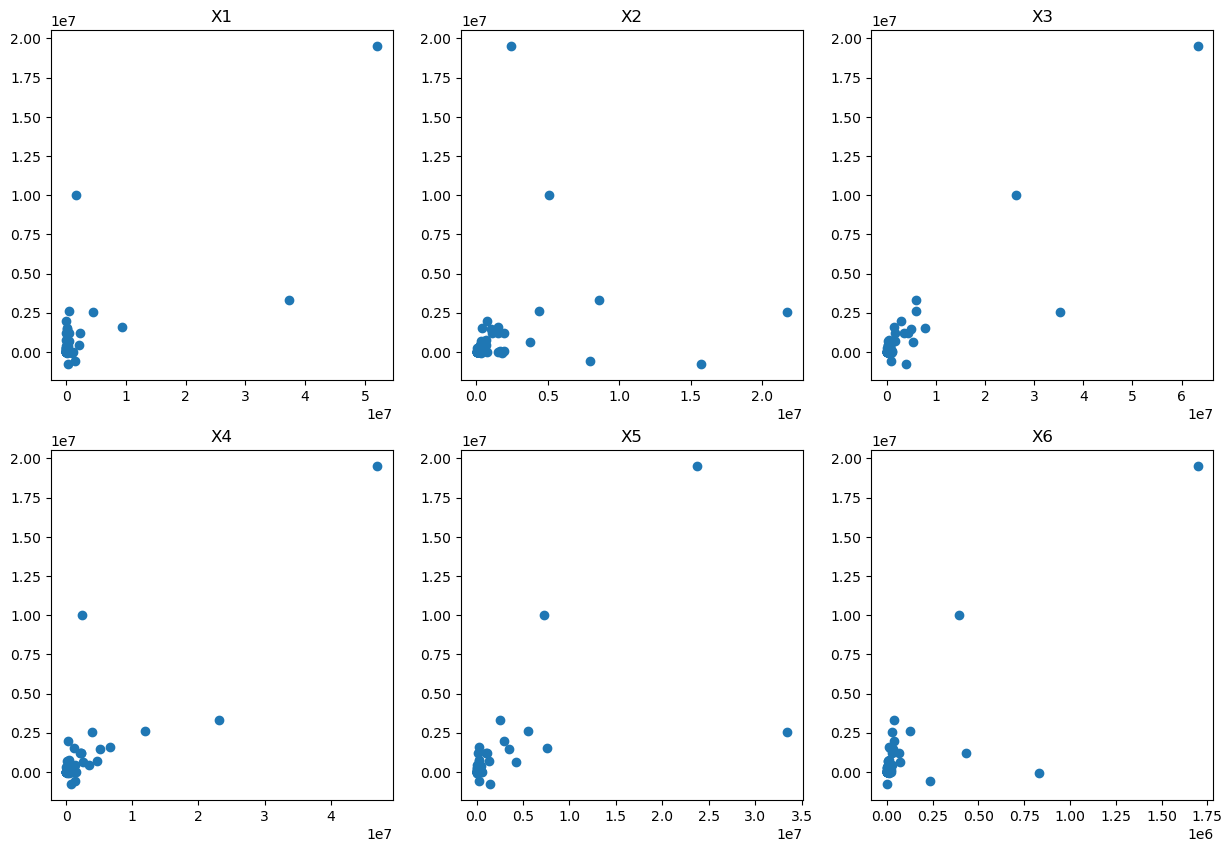

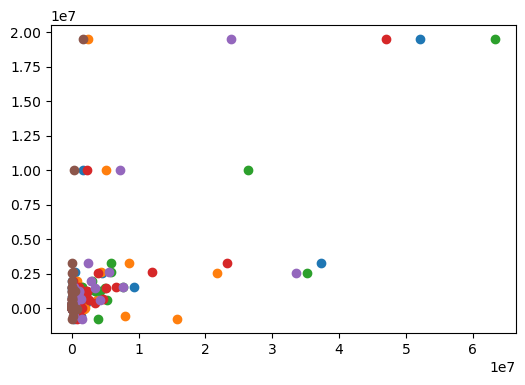

In [27]:
analysis.scatterplots(lines=False)
analysis.scatterplot(figsize=(6,4))

Большая часть значений каждого регрессора скоплена вокруг начала координат

# 3. Построить корреляционную матрицу и провести ее анализ.

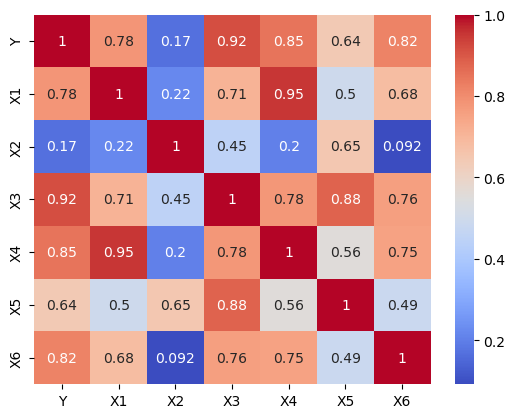

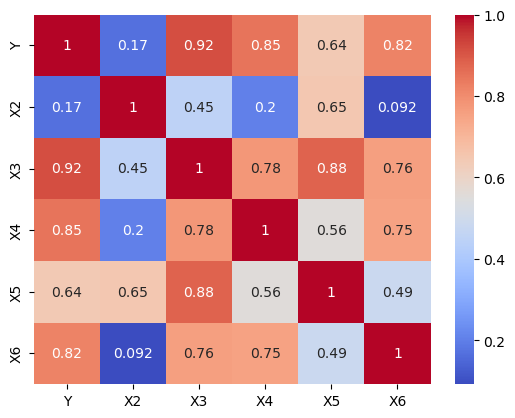

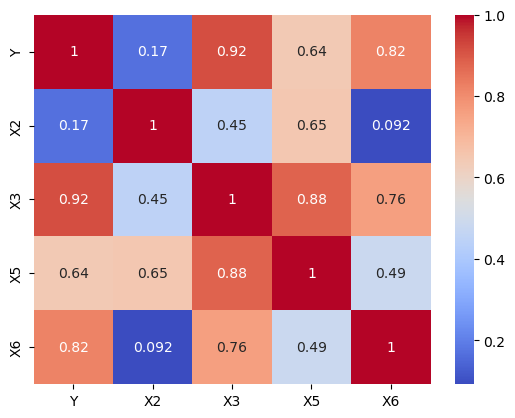

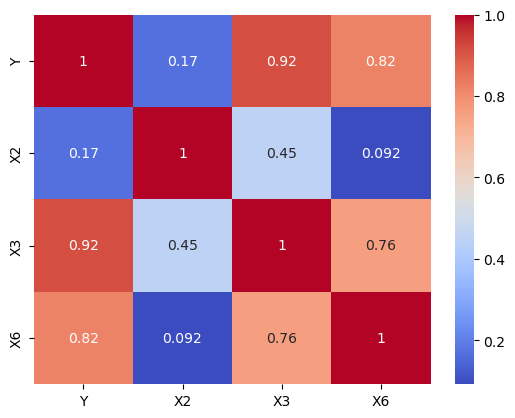

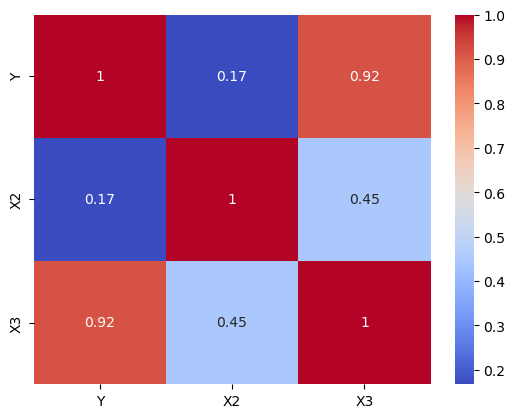

In [28]:
analysis.corr_matrix()
#analysis.drop_too_correlated_no_breaks(max_correl=0.8)
analysis.drop_too_correlated_x_times(times=4, max_correl=0.7)

In [29]:
analysis.correlations(do_ttest=False, only_y=True)

Связь между Y и X2 - ПРЯМАЯ ОЧЕНЬ СЛАБАЯ 

Связь между Y и X3 - ПРЯМАЯ СИЛЬНАЯ 



# 4. Построить модель со значимыми факторами. Факторы отбирать методом пошагового отбора. Сделать выводы и обосновать.									

In [30]:
analysis.sm_make_model()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     263.8
Date:                Sun, 06 Oct 2024   Prob (F-statistic):           1.27e-27
Time:                        12:28:04   Log-Likelihood:                -815.62
No. Observations:                  54   AIC:                             1637.
Df Residuals:                      51   BIC:                             1643.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.153e+05   1.36e+05      2.323      0.024    4.28e+04    5.88e+05
x1            -0.2336      0.036     -6.521      0.000      -0.306      -0.162
x2             0.3068      0.014     22.614      0.000       0.280       0.334
==============================================================================
Omnibus:                       20.169   Durbin-Watson:                   1.676
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              112.280
Skew:                           0.506   Prob(JB):                     4.16e-25
Kurtosis:                       9.991   Cond. No.                     1.21e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.21e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

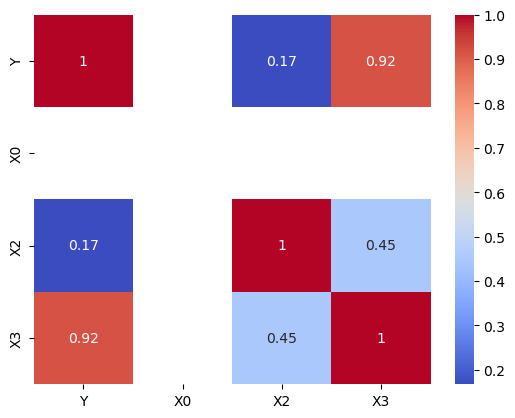

c:\Users\ivant\Desktop\proj\FU\Course_2\ECONOMETRICS\Boxan_obj.py:296: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  self.p_values={self.x_col.columns[i]: self.model.pvalues[i] for i in range(0, len(self.x_col.columns))}


In [31]:
analysis.sm_remove_columns(times=3)

In [32]:
analysis.model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     263.8
Date:                Sun, 06 Oct 2024   Prob (F-statistic):           1.27e-27
Time:                        12:28:04   Log-Likelihood:                -815.62
No. Observations:                  54   AIC:                             1637.
Df Residuals:                      51   BIC:                             1643.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.153e+05   1.36e+05      2.323      0.024    4.28e+04    5.88e+05
x1            -0.2336      0.036     -6.521      0.000      -0.306      -0.162
x2             0.3068      0.014     22.614      0.000       0.280       0.334
==============================================================================
Omnibus:                       20.169   Durbin-Watson:                   1.676
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              112.280
Skew:                           0.506   Prob(JB):                     4.16e-25
Kurtosis:                       9.991   Cond. No.                     1.21e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.21e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [33]:
analysis.sl_make_model()

0.9118563232045824

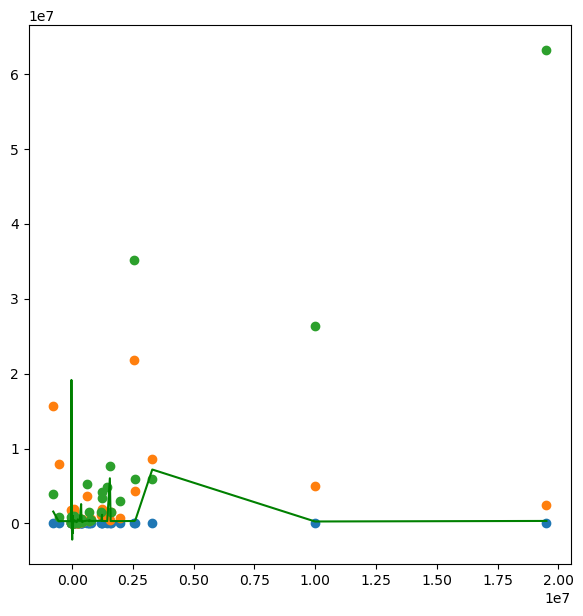

In [34]:
analysis.sl_plot()